In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
from numpy.polynomial import Polynomial
import yfinance as yf

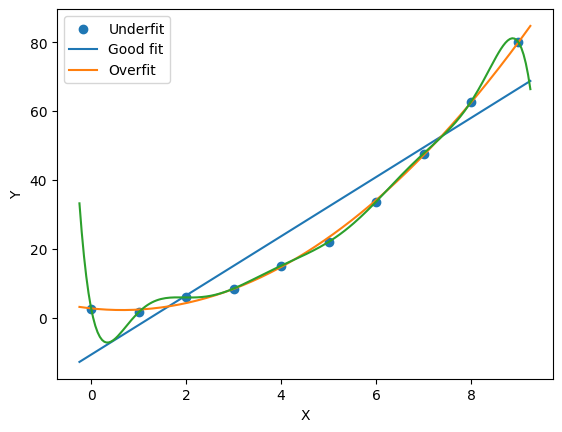

In [10]:
x = np.arange(10)
y = 2*np.random.randn(10) + x**2
xs = np.linspace(-0.25,9.25,200)

model_under = Polynomial.fit(x, y, deg=1)
model_good  = Polynomial.fit(x, y, deg=2)
model_over  = Polynomial.fit(x, y, deg=9)   

plt.scatter(x, y)
plt.plot(xs, model_under(xs))
plt.plot(xs, model_good(xs))
plt.plot(xs, model_over(xs))
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(['Underfit', 'Good fit', 'Overfit']);


# Example: Regression parameters


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_42744\3445152287.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slr_prediction = slr.params[0] + slr.params[1] * x1
C:\Users\USER\AppData\Local\Temp\ipykernel_42744\3445152287.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m

SLR R-squared: 0.7759428173320055
SLR p-value: 2.1628295272871265e-83
MLR R-squared: 0.8290067339172978
MLR R-squared: 2.673833402306508e-94


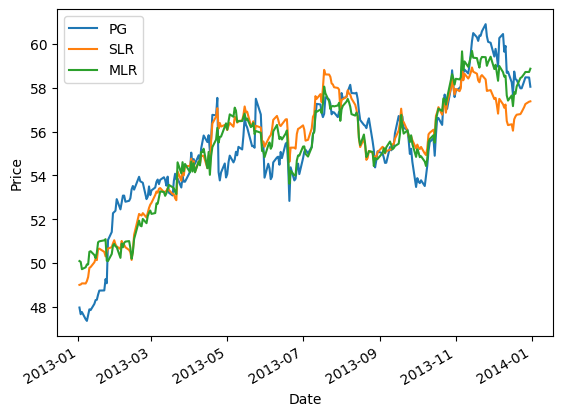

In [18]:
start = '2013-01-01'
end = '2014-01-01'
x1 = yf.download('PEP',start=start, end=end)['Close']['PEP']
x2 = yf.download('MCD',start=start, end=end)['Close']['MCD']
x3 = yf.download('AAPL',start=start, end=end)['Close']['AAPL']
x4 = yf.download('TSLA',start=start, end=end)['Close']['TSLA']
y = yf.download('PG',start=start, end=end)['Close']['PG']

slr = regression.linear_model.OLS(y,sm.add_constant(x1)).fit()
slr_prediction = slr.params[0] + slr.params[1] * x1

mlr = regression.linear_model.OLS(y, sm.add_constant(np.column_stack((x1,x2,x3,x4)))).fit()
mlr_prediction = mlr.params[0] + mlr.params[1]*x1 + mlr.params[2]*x2 + mlr.params[3]*x3 + mlr.params[4]*x4

print(f"SLR R-squared: {slr.rsquared_adj}")
print(f"SLR p-value: {slr.f_pvalue}")
print(f"MLR R-squared: {mlr.rsquared_adj}")
print(f"MLR R-squared: {mlr.f_pvalue}")

# Plot y along with the two different predictions
y.plot()
slr_prediction.plot()
mlr_prediction.plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['PG', 'SLR', 'MLR']);

# Example: Rolling windows


[*********************100%***********************]  1 of 1 completed


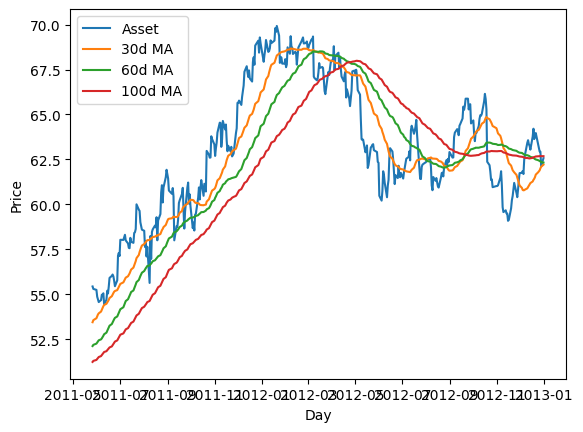

In [19]:
start = '2011-01-01'
end = '2013-01-01'
pricing = yf.download('MCD',start=start ,end=end)['Close']['MCD']

# Compute rolling averages for various window lengths
mu_30d = pricing.rolling(window=30).mean()
mu_60d = pricing.rolling(window=60).mean()
mu_100d = pricing.rolling(window=100).mean()

# Plot asset pricing data with rolling means from the 100th day, when all the means become available
plt.plot(pricing[100:], label='Asset')
plt.plot(mu_30d[100:], label='30d MA')
plt.plot(mu_60d[100:], label='60d MA')
plt.plot(mu_100d[100:], label='100d MA')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend();

In [20]:
# Trade using a simple mean-reversion strategy
def trade(stock, length):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if length == 0:
        return 0
    
    # Compute rolling mean and rolling standard deviation
    rolling_window = stock.rolling(window=length)
    mu = rolling_window.mean()
    std = rolling_window.std()
    
    # Compute the z-scores for each day using the historical data up to that day
    zscores = (stock - mu)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    count = 0
    for i in range(len(stock)):
        # Sell short if the z-score is > 1
        if zscores[i] > 1:
            money += stock[i]
            count -= 1
        # Buy long if the z-score is < 1
        elif zscores[i] < -1:
            money -= stock[i]
            count += 1
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscores[i]) < 0.5:
            money += count*stock[i]
            count = 0
    return money

In [21]:
# Find the window length 0-254 that gives the highest returns using this strategy
length_scores = [trade(pricing, l) for l in range(255)]
best_length = np.argmax(length_scores)
print(f"Best window length: {best_length}")

C:\Users\USER\AppData\Local\Temp\ipykernel_42744\3170546435.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if zscores[i] > 1:
C:\Users\USER\AppData\Local\Temp\ipykernel_42744\3170546435.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif zscores[i] < -1:
C:\Users\USER\AppData\Local\Temp\ipykernel_42744\3170546435.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif abs(zscores[i]) < 0.5:
C:\Users\USER\AppData\Local\

Best window length: 11


In [ ]:
# Get pricing data for a different timeframe
start2 = '2013-01-01'
end2 = '2015-01-01'
pricing2 = yf.download('MCD', start = start2,end = end2)['Close']['MCD']

length_scores2 = [trade(pricing2, l) for l in range(255)]
print(f"{best_length} , 'day_window:', {length_scores2[best_length]}")

best_length2 = np.argmax(length_scores2)
print(f"{best_length2},'day window:',{length_scores2[best_length2]}")

[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_42744\3170546435.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if zscores[i] > 1:
C:\Users\USER\AppData\Local\Temp\ipykernel_42744\3170546435.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif zscores[i] < -1:
C:\Users\USER\AppData\Local\Temp\ipykernel_42744\3170546435.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

11 , 'day_window:', 17.165184020996094
141,'day window:',302.29642486572266


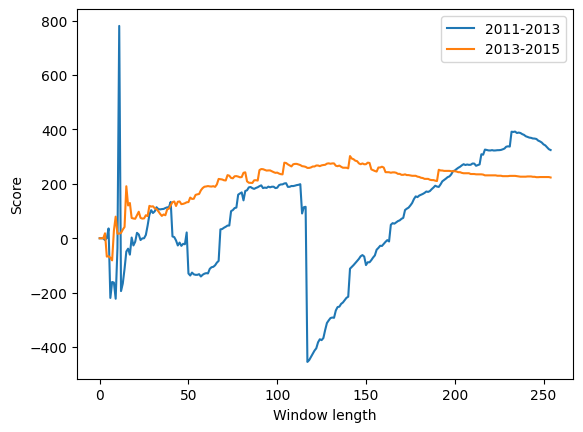

In [25]:
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['2011-2013', '2013-2015']);